# Urban Green Areas in Manchester

In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import geoplot as gplt

ModuleNotFoundError: No module named 'geoplot'

### Greater Manchester Boundaries

In [ ]:
# Map Greater Manchester boundaries
# Boundary shape files from https://osdatahub.os.uk/downloads/open/BoundaryLine
# Simplified with https://mapshaper.org/
fp = 'data/boundary_lines/district_borough_unitary_region.shp'
df = gpd.read_file(fp)

In [ ]:
greater_manchester_districts = [
    'Manchester District (B)',
    'Bury District (B)',
    'Oldham District (B)',
    'Rochdale District (B)',
    'Salford District (B)',
    'Trafford District (B)',
    'Stockport District (B)',
    'Tameside District (B)',
    'Bolton District (B)',
    'Wigan District (B)',
]

In [ ]:
# Filtering to Greater Manchester
df = df[df['NAME'].isin(greater_manchester_districts)]

In [ ]:
# Define Greater Manchester
from shapely.ops import cascaded_union

greater_manchester = gpd.GeoSeries(cascaded_union(df.geometry))

<AxesSubplot:>

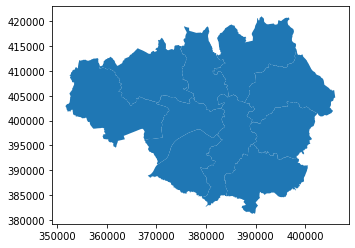

In [ ]:
df.plot()

### Green spaces in Greater Manchester

In [ ]:
fp = 'data/greenspace_SD/SD_GreenspaceSite.shp'
gs_sd = gpd.read_file(fp)

fp = 'data/greenspace_SJ/SJ_GreenspaceSite.shp'
gs_sj = gpd.read_file(fp)

gs = gpd.GeoDataFrame(
    pd.concat([gs_sd, gs_sj], ignore_index=True)
)

In [ ]:
# Green spaces areas bu function
gs.function.value_counts()

Play Space                                4344
Playing Field                             2763
Religious Grounds                         2650
Other Sports Facility                     2126
Public Park Or Garden                     1725
Bowling Green                             1438
Allotments Or Community Growing Spaces    1395
Cemetery                                   680
Tennis Court                               659
Golf Course                                394
Name: function, dtype: int64

In [ ]:
# Keeping parcs
function_types = ['Public Park Or Garden']
gs = gs[gs['function'].isin(function_types)]

In [ ]:
# Filtering down to green spaces in greater manchester
intersections = gpd.overlay(df, gs, how='intersection')

<AxesSubplot:>

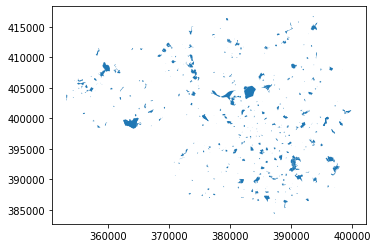

In [ ]:
intersections.plot()